# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang saya gunakan kali ini berasal dari Kaggle, dataset ini merupakan dataset terkait Car Price Prediction yang di dalamnya terdapat beberapa fitur sebagai berikut :

Car ID : Unique identifier for each car listing

Brand : Car manufacturer (e.g., Toyota, Honda, Suzuki)

Model : Specific car model name

Year : Manufacturing year of the car

Mileage : Total distance driven (in kilometers)

Fuel Type : Type of fuel used (Petrol, Diesel, Hybrid, Electric)

Transmission : Type of gear system (Manual / Automatic)

Condition : Overall car condition (New, Used, Excellent, etc.)

Price : Market price of the car (target variable)

Sumber dataset : https://www.kaggle.com/datasets/aliiihussain/car-price-prediction

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import datetime
#Type your code here

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [117]:
#Type your code here
df = pd.read_csv("car_price_prediction_.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [118]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [119]:
df.describe(include="all")

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [120]:
#Menghapus Kolom Car ID, karena tidak berguna dalam pembangunan model nantinya
df.drop("Car ID", axis=1, inplace=True)

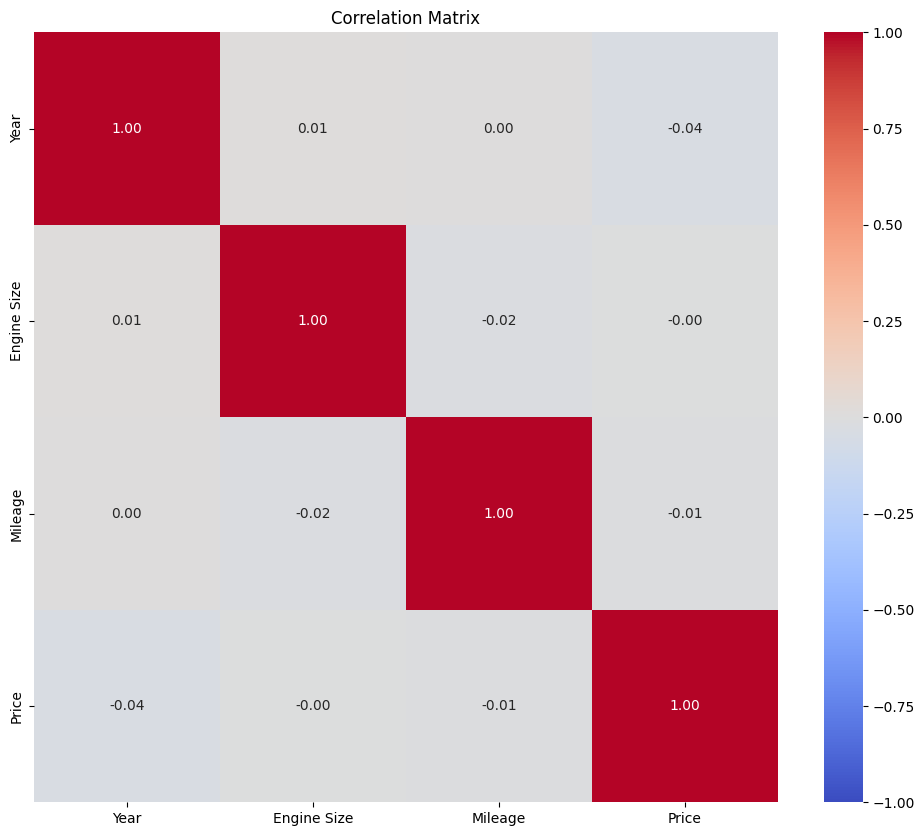

In [121]:
#Melihat korelasi antar variabel numerik menggunakan heatmap
df_numeric = df[df.select_dtypes(include = ['number']).columns]
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

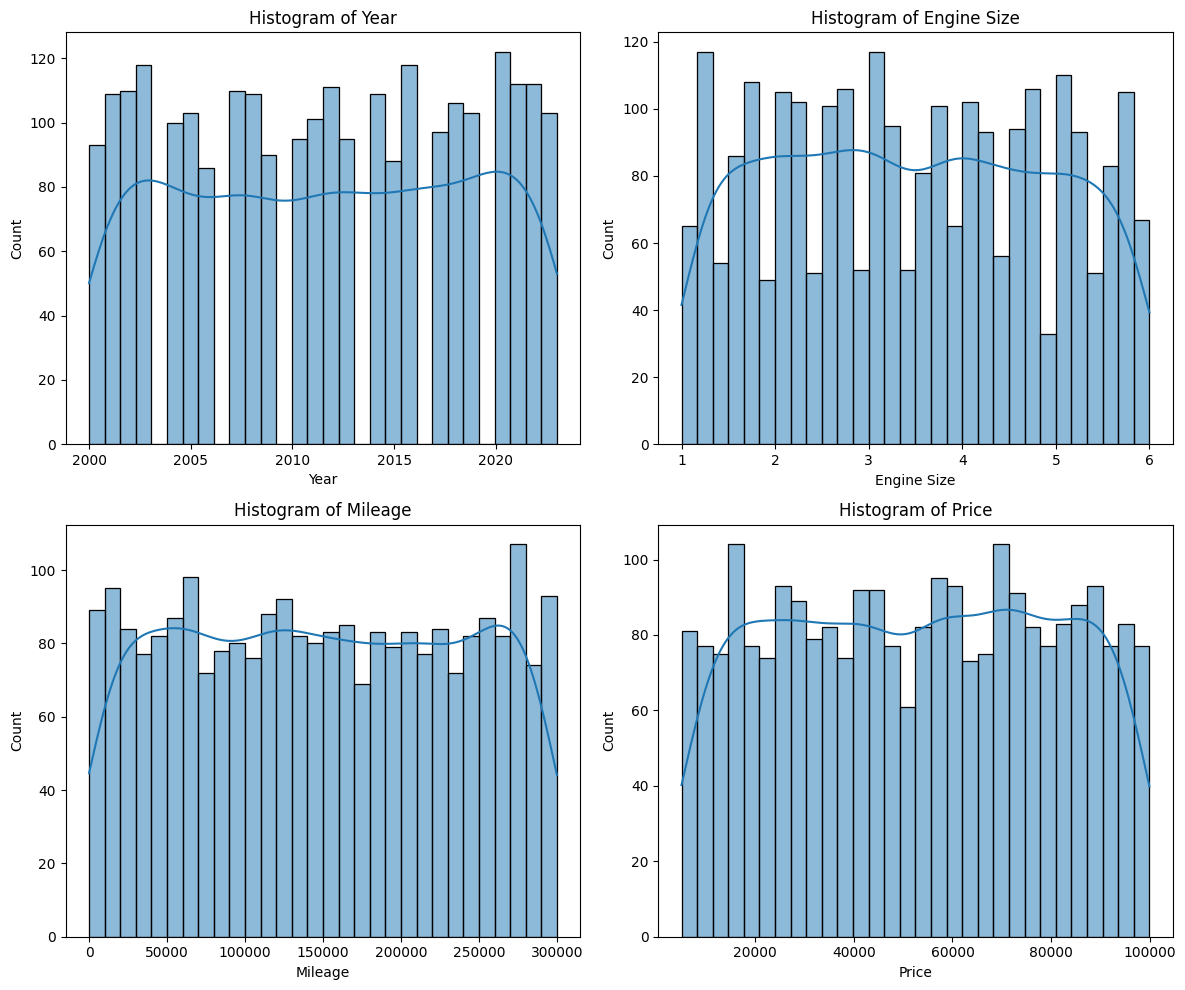

In [122]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df_numeric):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

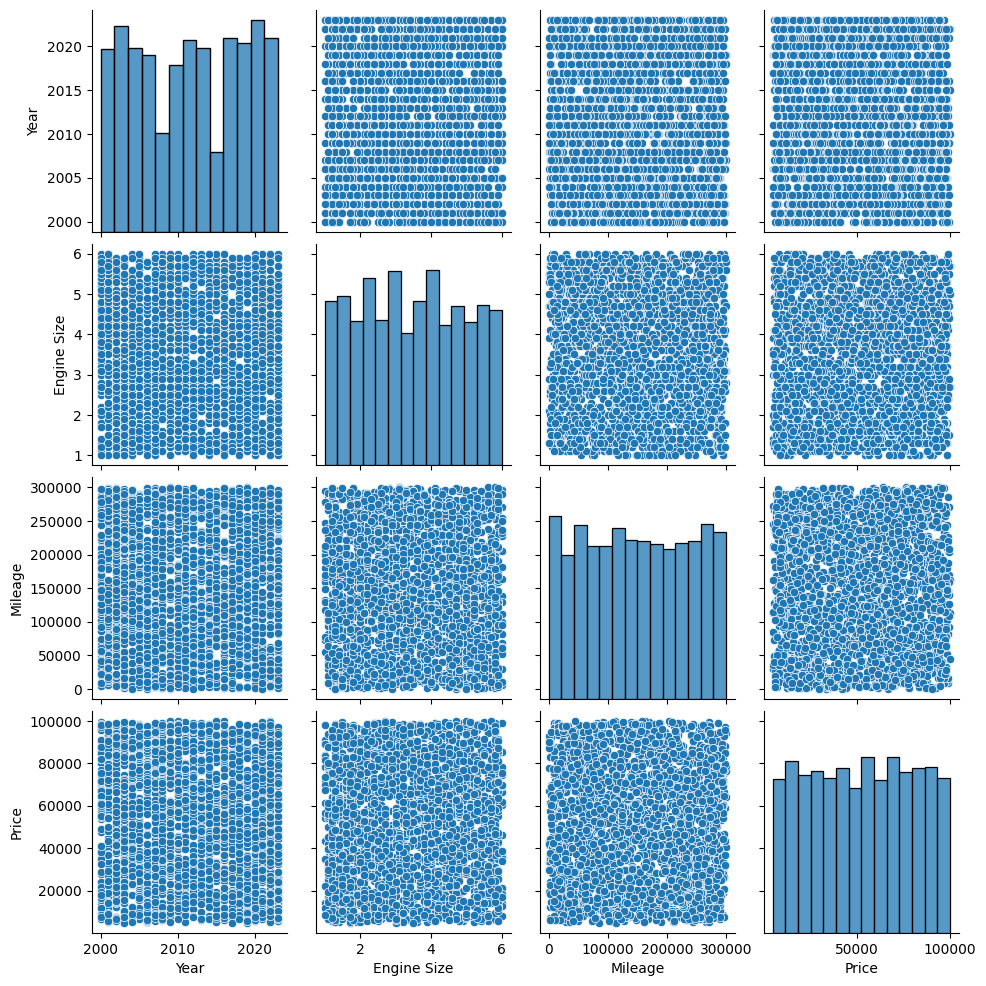

In [123]:
#Melihat hubungan fitur dengan pairplot
sns.pairplot(df_numeric)
plt.show()

In [124]:
df_categorical = df[df.select_dtypes(include = ['object']).columns]
df_categorical.head()

,Brand,Fuel Type,Transmission,Condition,Model
0,Tesla,Petrol,Manual,New,Model X
1,BMW,Electric,Manual,Used,5 Series
2,Audi,Electric,Manual,New,A4
3,Tesla,Diesel,Automatic,New,Model Y
4,Ford,Diesel,Manual,Like New,Mustang


/tmp/ipython-input-2756865250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_categorical, order=df_categorical[col].value_counts().index, palette='Set2')
/tmp/ipython-input-2756865250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_categorical, order=df_categorical[col].value_counts().index, palette='Set2')
/tmp/ipython-input-2756865250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_categorical, order=df_categorical[col].value_counts().index, palette='Set2')
/tmp/ipython-input-

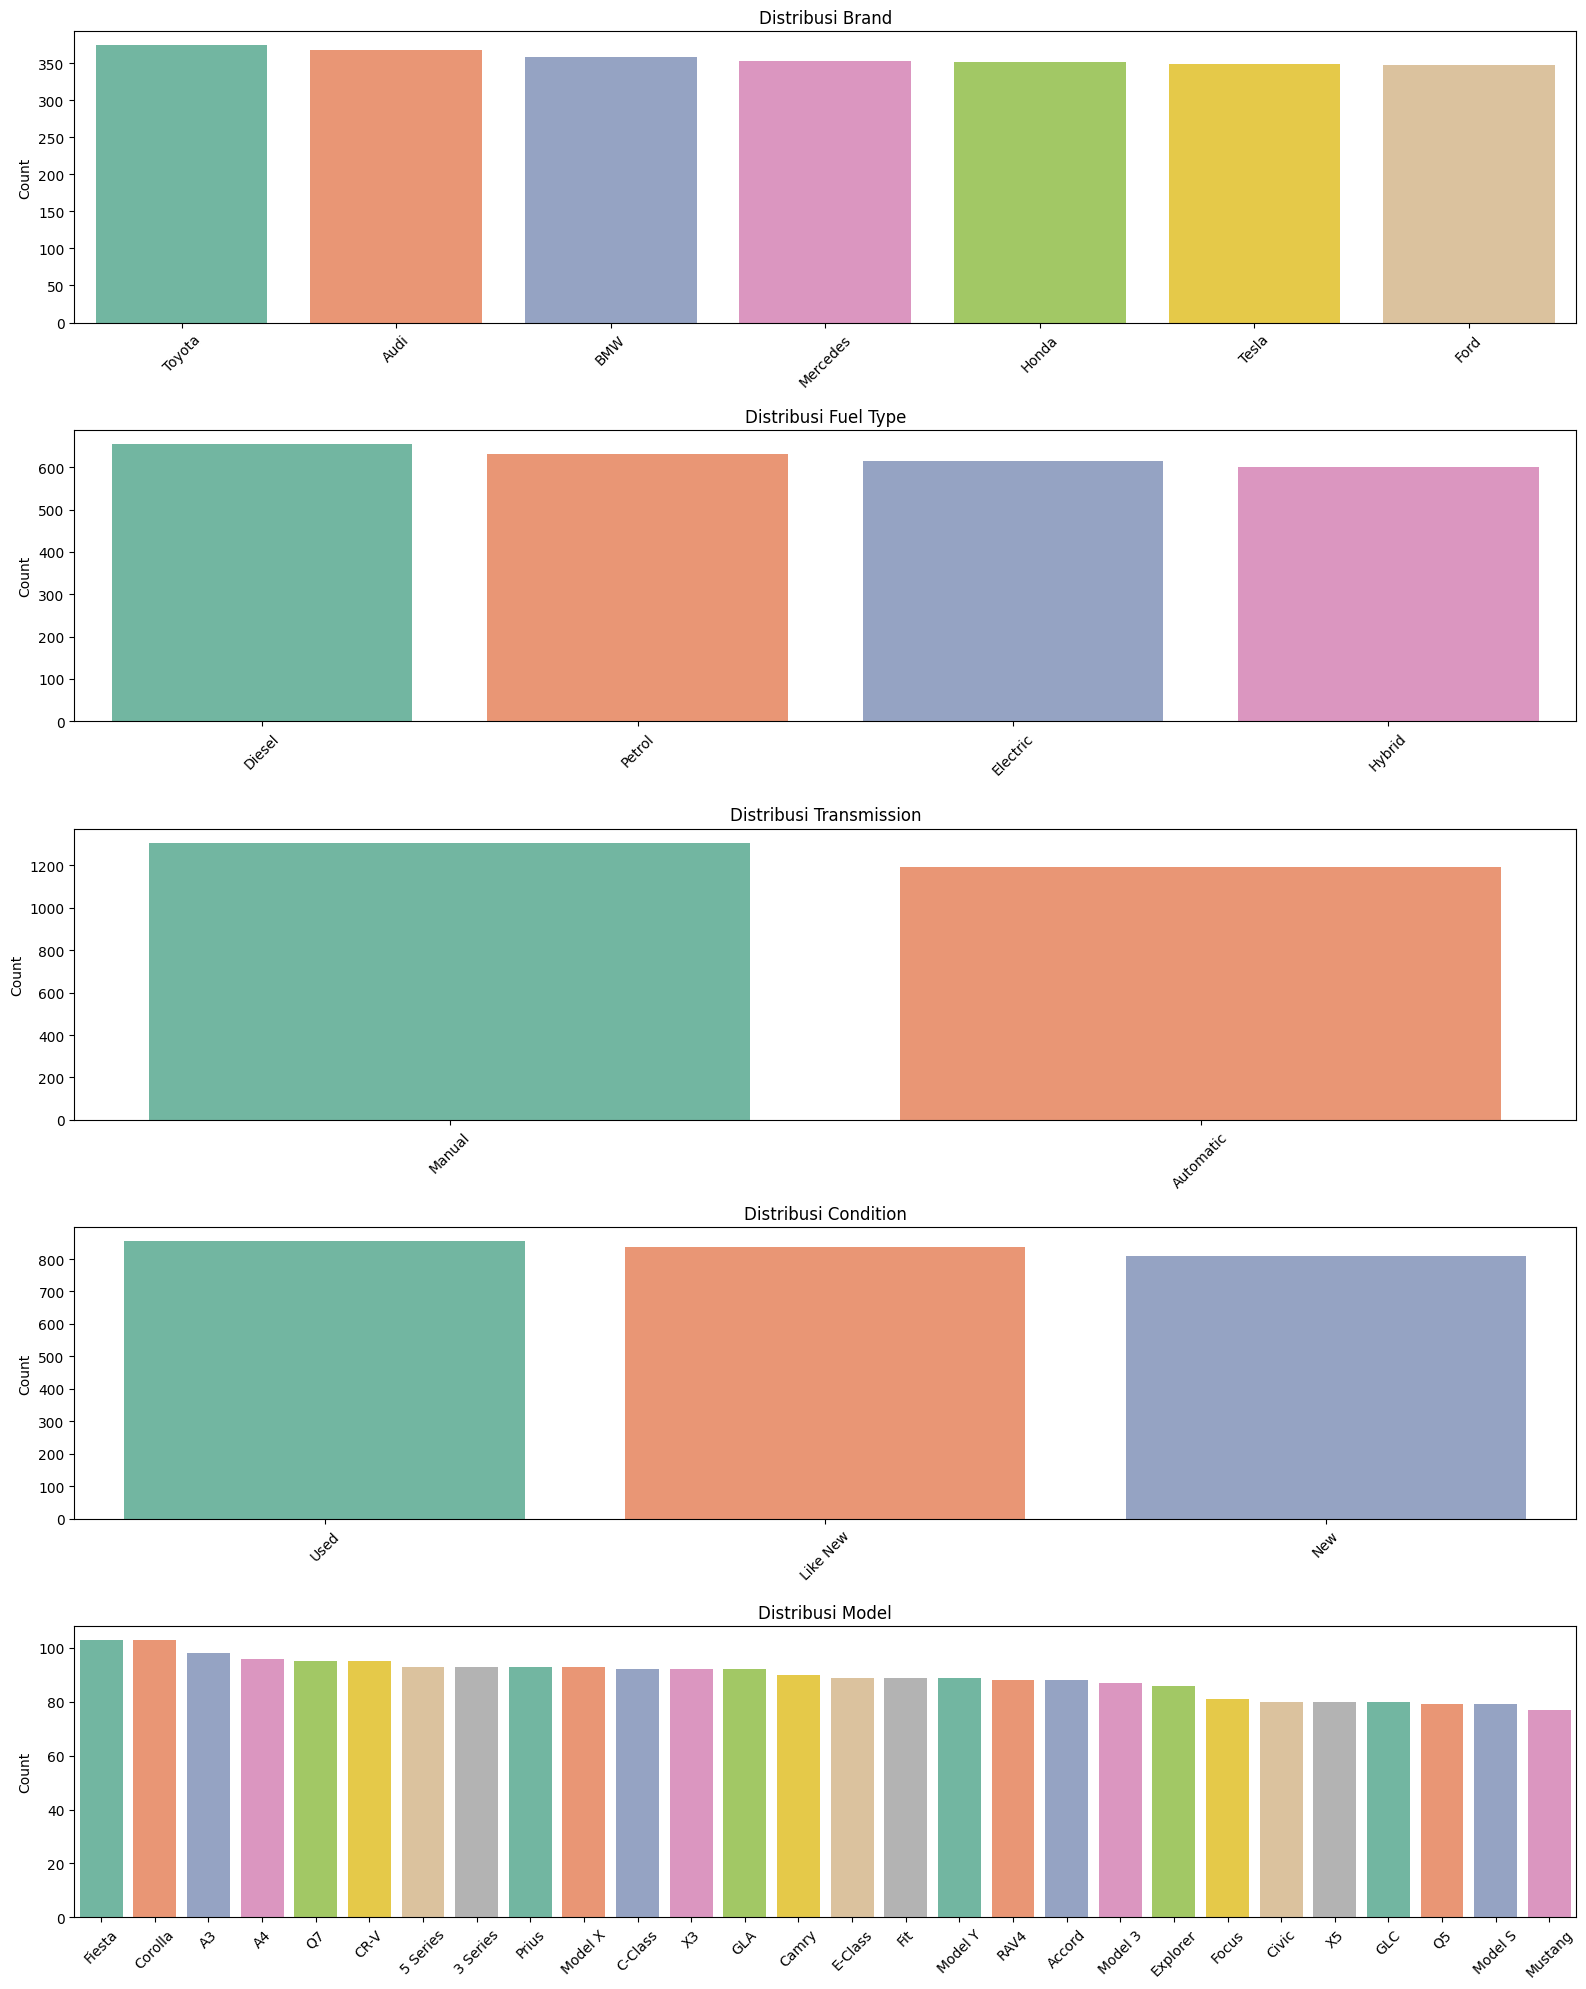

In [125]:
plt.figure(figsize=(16, len(df_categorical.columns)*4))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(x=col, data=df_categorical, order=df_categorical[col].value_counts().index, palette='Set2')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


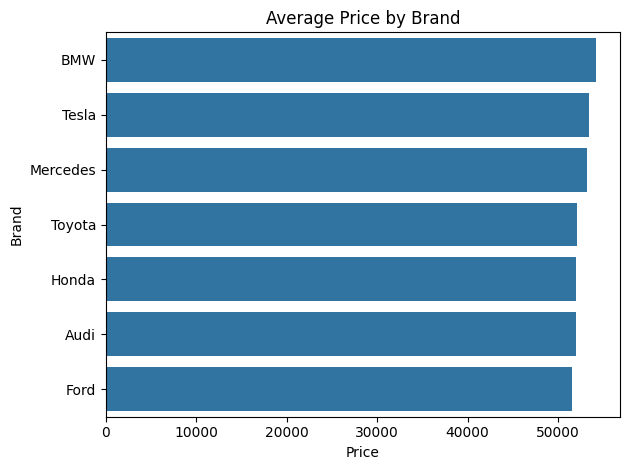

In [126]:
#Melihat harga rata rata dari brand
avg_prices = df.groupby("Brand", as_index=False)["Price"].mean().sort_values(by="Price", ascending=False)
sns.barplot(x='Price', y='Brand', data=avg_prices)
plt.title('Average Price by Brand')
plt.tight_layout()
plt.show()

Dari EDA ini, kita bisa mendapat insight terkait beberapa hal, diantaranya :
1. Tidak ada distribusi atau tipe data yang salah
2. Pada Matriks korelasi, terlihat tidak ada fitur yang terlalu berperan dominan terhadap fitur lain.
3. Dari data histogram terkait fitur numerik, rata rata fitur numerik memiliki data ber distribusi normal, terlihat dari garis pada histogram
4. Terlihat pada pairplot, distribusi data cenderung beragam, tidak berat sebelah pada fitur manapun.
5. Saya membuat distribusi data kategorikal berdasarkan data terbanyak, dan terlihat bahwa brand yang paling banyak datanya adalah Toyota, untuk Fuel Type adalah Diesel, untuk Transmission adalah Manual, Condition terbanyak adalah Used, dan model terbanyak adalah fiesta.
6. Brand paling mahal berdasarkan rata rata harganya adalah BMW.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [127]:
#Pengecekan Missing Value
missvalues = df.isnull().sum()
missvalues[missvalues>0]

,0


In [128]:
#Pengecekan data duplikat
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

In [129]:
#Untuk fitur Year, akan diubah menjadi fitur Age yang menunjukkan Umur Mobil sampai tahun ini(2025)
df['Age'] = datetime.datetime.now().year - df['Year']

In [130]:
#Penanganan Outlier
numeric_features = ['Engine Size', 'Mileage', 'Age']
for col in numeric_features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   object 
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   object 
 9   Age           2500 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [132]:
# Selanjutnya fitur numerik akan di standarisasi sebagai berikut
scaler = StandardScaler()
df[['Engine_scaled', 'Mileage_scaled', 'Age_scaled']] = scaler.fit_transform(df[['Engine Size', 'Mileage', 'Age']])

In [133]:
df.describe(include='all')

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Age,Engine_scaled,Mileage_scaled,Age_scaled
count,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500,2500.0000,2.500000e+03,2.500000e+03,2.500000e+03
unique,7,NaN,NaN,4,2,NaN,3,NaN,28,NaN,NaN,NaN,NaN
top,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta,NaN,NaN,NaN,NaN
freq,374,NaN,NaN,655,1308,NaN,855,NaN,103,NaN,NaN,NaN,NaN
mean,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN,13.3732,5.487166e-16,9.379164e-17,-9.094947e-17
std,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN,6.9917,1.000200e+00,1.000200e+00,1.000200e+00
min,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN,2.0000,-1.721817e+00,-1.703422e+00,-1.626997e+00
25%,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN,7.0000,-8.836915e-01,-8.864192e-01,-9.117203e-01
50%,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN,13.0000,-4.556608e-02,-7.563446e-03,-5.338825e-02
75%,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN,20.0000,8.624031e-01,8.673334e-01,9.479991e-01


In [134]:
#Untuk Encoding Fitur Kategorikal
le = LabelEncoder()
for col in df_categorical:
    df[col] = le.fit_transform(df[col])


In [135]:
df.describe(include="all")

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Age,Engine_scaled,Mileage_scaled,Age_scaled
count,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000,2.500000e+03,2.500000e+03,2.500000e+03
mean,3.001600,2011.6268,3.465240,1.482400,0.523200,149749.844800,1.007600,52638.022532,13.255600,13.3732,5.487166e-16,9.379164e-17,-9.094947e-17
std,2.020503,6.9917,1.432053,1.130576,0.499561,87919.952034,0.822565,27295.833455,8.106229,6.9917,1.000200e+00,1.000200e+00,1.000200e+00
min,0.000000,2000.0000,1.000000,0.000000,0.000000,15.000000,0.000000,5011.270000,0.000000,2.0000,-1.721817e+00,-1.703422e+00,-1.626997e+00
25%,1.000000,2005.0000,2.200000,0.000000,0.000000,71831.500000,0.000000,28908.485000,6.000000,7.0000,-8.836915e-01,-8.864192e-01,-9.117203e-01
50%,3.000000,2012.0000,3.400000,1.000000,1.000000,149085.000000,1.000000,53485.240000,13.000000,13.0000,-4.556608e-02,-7.563446e-03,-5.338825e-02
75%,5.000000,2018.0000,4.700000,3.000000,1.000000,225990.500000,2.000000,75838.532500,20.000000,20.0000,8.624031e-01,8.673334e-01,9.479991e-01
max,6.000000,2023.0000,6.000000,3.000000,1.000000,299967.000000,2.000000,99982.590000,27.000000,25.0000,1.770372e+00,1.708909e+00,1.663276e+00


In [136]:
#Drop data yang tidak diperlukan lagi
df.drop(['Engine Size','Mileage', 'Age','Year'], axis=1, inplace=True)

In [137]:
df.describe(include='all')

,Brand,Fuel Type,Transmission,Condition,Price,Model,Engine_scaled,Mileage_scaled,Age_scaled
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03
mean,3.001600,1.482400,0.523200,1.007600,52638.022532,13.255600,5.487166e-16,9.379164e-17,-9.094947e-17
std,2.020503,1.130576,0.499561,0.822565,27295.833455,8.106229,1.000200e+00,1.000200e+00,1.000200e+00
min,0.000000,0.000000,0.000000,0.000000,5011.270000,0.000000,-1.721817e+00,-1.703422e+00,-1.626997e+00
25%,1.000000,0.000000,0.000000,0.000000,28908.485000,6.000000,-8.836915e-01,-8.864192e-01,-9.117203e-01
50%,3.000000,1.000000,1.000000,1.000000,53485.240000,13.000000,-4.556608e-02,-7.563446e-03,-5.338825e-02
75%,5.000000,3.000000,1.000000,2.000000,75838.532500,20.000000,8.624031e-01,8.673334e-01,9.479991e-01
max,6.000000,3.000000,1.000000,2.000000,99982.590000,27.000000,1.770372e+00,1.708909e+00,1.663276e+00


In [138]:
df.to_csv("car_price_preprocessed.csv", index=False)